YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


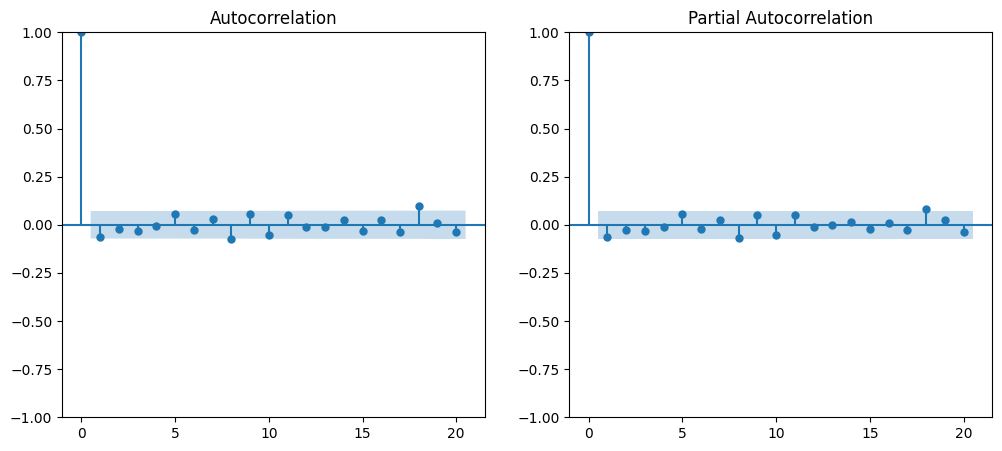

C:\Users\kenan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kenan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kenan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\kenan\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is ava

                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                  756
Model:                 ARIMA(5, 1, 0)   Log Likelihood               -1828.724
Date:                Thu, 06 Mar 2025   AIC                           3669.447
Time:                        23:50:29   BIC                           3697.207
Sample:                             0   HQIC                          3680.140
                                - 756                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0631      0.032     -1.988      0.047      -0.125      -0.001
ar.L2         -0.0279      0.032     -0.873      0.383      -0.090       0.035
ar.L3         -0.0320      0.036     -0.900      0.3

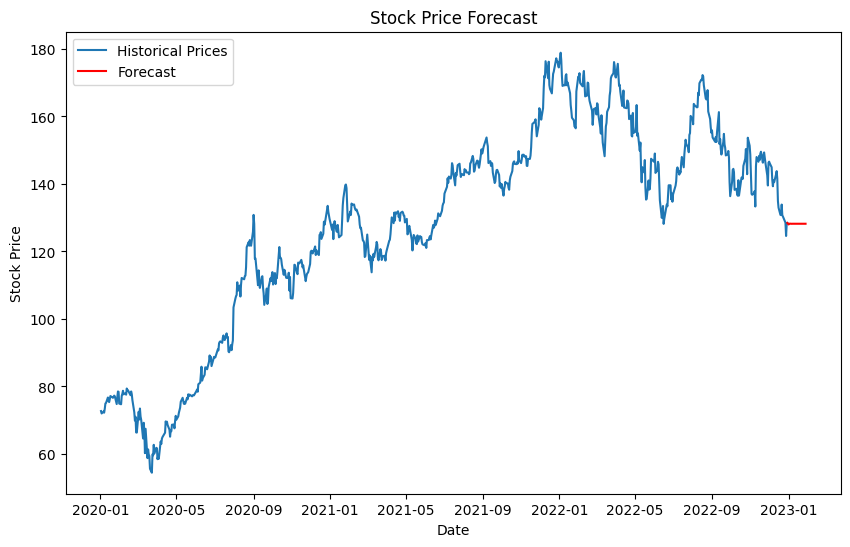

In [3]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
import yfinance as yf

#downlaod data
data = yf.download("AAPL", start="2023-01-01", end="2024-01-01")
df = pd.DataFrame()
df['Close'] = data['Close']
df['Target'] = df['Close'].shift(-1)


# Differencing to check for stationarity
diff = close_prices.diff().dropna()

# Plotting ACF and PACF
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
plot_acf(diff, lags=20, ax=ax1)
plot_pacf(diff, lags=20, ax=ax2)
plt.show()

# Define ARIMA Model (ARIMA(p, d, q))
# Here, we choose p=5, d=1, q=0 as a starting point
model = ARIMA(close_prices, order=(5, 1, 0))
fitted_model = model.fit()

# Summary of the model
#print(fitted_model.summary())

# Forecasting
forecast = fitted_model.forecast(steps=1)  # Forecast for the next 30 days
forecast_dates = pd.date_range(start=close_prices.index[-1], periods=30, freq='D')

# Plot the forecast
plt.figure(figsize=(10, 6))
plt.plot(close_prices, label='Historical Prices')
plt.plot(forecast_dates, forecast, label='Forecast', color='red')
plt.xlabel('Date')
plt.ylabel('Stock Price')
plt.title('Stock Price Forecast')
plt.legend()
plt.show()
